# Simple sequencing with DeepSeries regression

### In this example we show how to train on a one-dimensional time series and predict an arbitrary number of future steps in the sequence.

In [1]:
import numpy as np
import os, sys
%matplotlib inline
import matplotlib.pyplot as plt 
from deepseries import deepseries, preprocessing

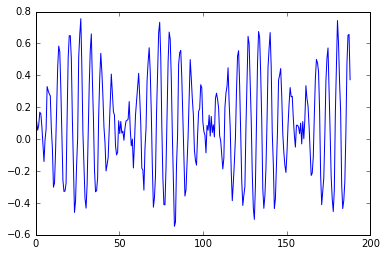

In [2]:
# Create mock data. For example, two coupled sinusoids:
Ncycles = 1000; Npoints = 10000; tau1 = 1; tau2 = 0.06
x_mock = np.linspace(0,Ncycles*2*np.pi,Npoints)
y_mock = np.sin(x_mock*tau1)*np.sin(x_mock*tau2)*.6
# add a bit of noise
y_mock += np.random.random(y_mock.size)*.2
# inspect plot
plt.plot(x_mock[:300],y_mock[:300])

In [3]:
# Break the sequence into chunks of `sequence_length`, and reshape as (N_samples, sequence_length, N_channels=1)
X, y = preprocessing.Slicer().fit(y_mock,sequence_length=100,kind='seq2seq')

# train-test split. The test data would be the trailing 20% of points in the full series
split_index = int(0.8*FX.shape[0])
Xtrain, Xtest, ytrain, ytest =  X[:split_index], X[split_index:], y[:split_index], y[split_index:]

In [5]:
# Initialize DeepSeries sequencer with regression learning
dsr = deepseries.Sequencer(Xtrain, ytrain, Xtest, ytest,
    Nnodes=40, 
    Nlayers=2,
    input_keep_prob=0.9,
    output_keep_prob=0.9,
    optimizer_type='AdamOptimizer', 
    optimizer_kwargs={'learning_rate':0.001},
    cell_kwargs = {'use_peepholes':False, 
                   'forget_bias':1,
                   'state_is_tuple':True},
    batch_size=50,
    cell_type='LSTMCell',
    tracking_step=30)

/Users/ezw112/miniconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/ops/gradients.py:90: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [6]:
# Train regressor. If this is your first time running it, try just one epoch to test the computation time.
dsr.fit(n_epochs=10)

train batch cost: 3.814, test cost: 3.752 
train batch cost: 1.404, test cost: 1.436 
train batch cost: 0.920, test cost: 0.920 
train batch cost: 0.790, test cost: 0.780 
train batch cost: 0.669, test cost: 0.693 
train batch cost: 0.664, test cost: 0.629 
train batch cost: 0.581, test cost: 0.616 
train batch cost: 0.602, test cost: 0.585 
train batch cost: 0.555, test cost: 0.557 
train batch cost: 0.558, test cost: 0.536 
train batch cost: 0.517, test cost: 0.523 
train batch cost: 0.523, test cost: 0.514 
train batch cost: 0.534, test cost: 0.516 
train batch cost: 0.481, test cost: 0.510 
train batch cost: 0.534, test cost: 0.504 
train batch cost: 0.510, test cost: 0.501 
train batch cost: 0.521, test cost: 0.498 
train batch cost: 0.528, test cost: 0.490 
train batch cost: 0.482, test cost: 0.489 
train batch cost: 0.483, test cost: 0.487 
train batch cost: 0.473, test cost: 0.475 
train batch cost: 0.479, test cost: 0.475 
train batch cost: 0.466, test cost: 0.466 
train batch

In [7]:
# Now that we have a trained machine, let's take 
# an end chunk of the test data and have the network 
# predict future values. 
N_points_to_predict = 180
prediction = dsr.unroll(Xtest[-1:], n_output=N_points_to_predict)

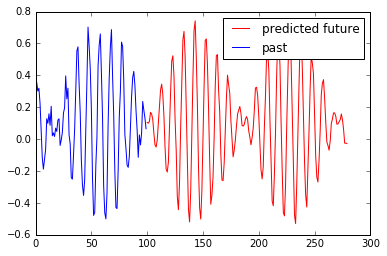

In [8]:
# Plot the future vs past
past_sequence = Xtest[-1:].ravel()
past_plus_future_sequence = np.r_[[np.nan]*past_sequence.size, prediction.ravel()]
plt.plot(past_plus_future_sequence, color='r', label='predicted future')
plt.plot(past_sequence, color='blue', label='past')
plt.legend()